In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random as rn
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D,GlobalAvgPool2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.optimizers import Adam
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [4]:
labels = os.listdir('data/train')
print(labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [94]:
train_path = 'data/train/{0}/'
test_path = 'data/valid/{0}/'
num_cls = len(labels)
num_cls

38

In [95]:
num = []
for label in labels:
    path = train_path.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')


 APPLE___APPLE_SCAB
there are  2016  images in  Apple___Apple_scab class

 APPLE___BLACK_ROT
there are  1987  images in  Apple___Black_rot class

 APPLE___CEDAR_APPLE_RUST
there are  1760  images in  Apple___Cedar_apple_rust class

 APPLE___HEALTHY
there are  2008  images in  Apple___healthy class

 BLUEBERRY___HEALTHY
there are  1816  images in  Blueberry___healthy class

 CHERRY_(INCLUDING_SOUR)___HEALTHY
there are  1826  images in  Cherry_(including_sour)___healthy class

 CHERRY_(INCLUDING_SOUR)___POWDERY_MILDEW
there are  1683  images in  Cherry_(including_sour)___Powdery_mildew class

 CORN_(MAIZE)___CERCOSPORA_LEAF_SPOT GRAY_LEAF_SPOT
there are  1642  images in  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot class

 CORN_(MAIZE)___COMMON_RUST_
there are  1907  images in  Corn_(maize)___Common_rust_ class

 CORN_(MAIZE)___HEALTHY
there are  1859  images in  Corn_(maize)___healthy class

 CORN_(MAIZE)___NORTHERN_LEAF_BLIGHT
there are  1908  images in  Corn_(maize)___Northern_

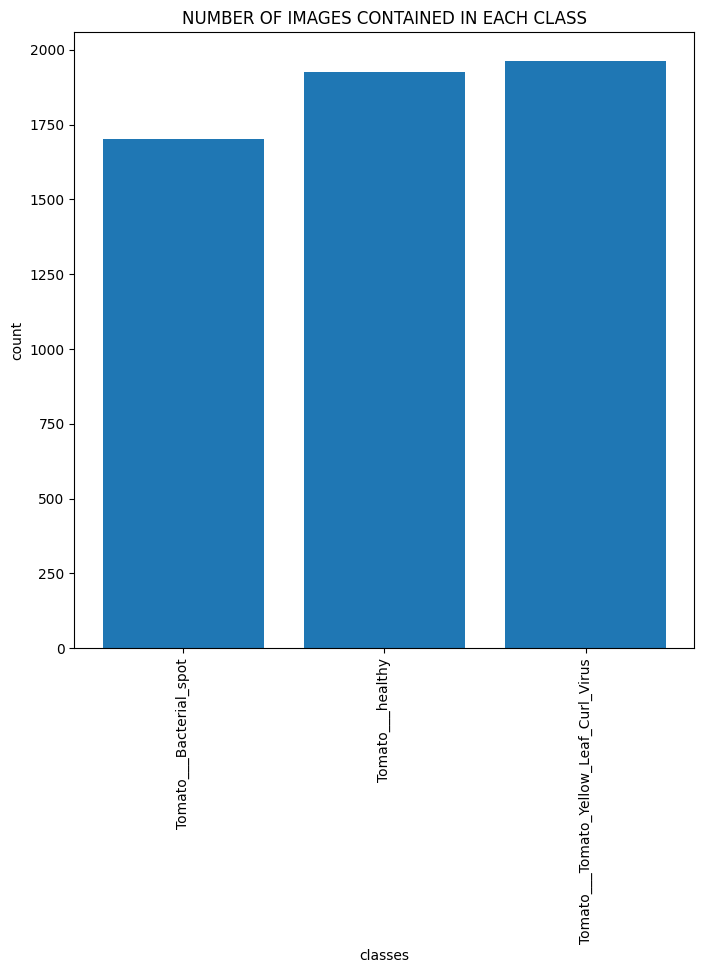

In [75]:
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [76]:
import os
import cv2
import numpy as np

x_data =[]
y_data = []
for label in labels:
    path = train_path.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (224,224))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [77]:
num = []
for label in labels:
    k = 0
    print('\n', label.upper())
    for image_path in x_data:
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')


 TOMATO___BACTERIAL_SPOT
there are  5589  images in  Tomato___Bacterial_spot class

 TOMATO___HEALTHY
there are  5589  images in  Tomato___healthy class

 TOMATO___TOMATO_YELLOW_LEAF_CURL_VIRUS
there are  5589  images in  Tomato___Tomato_Yellow_Leaf_Curl_Virus class


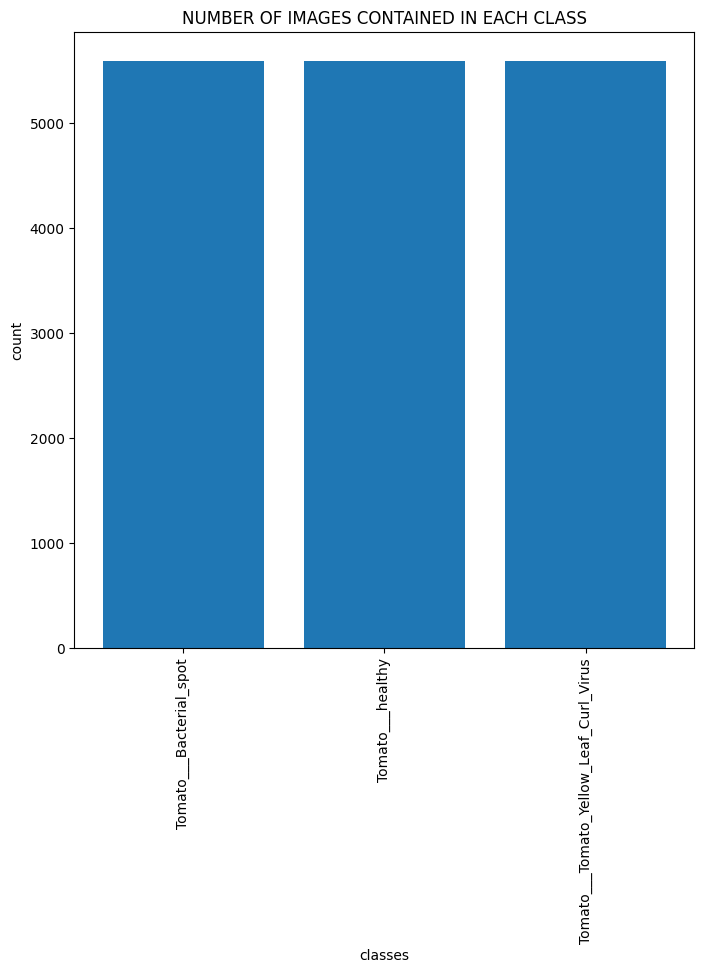

In [78]:
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

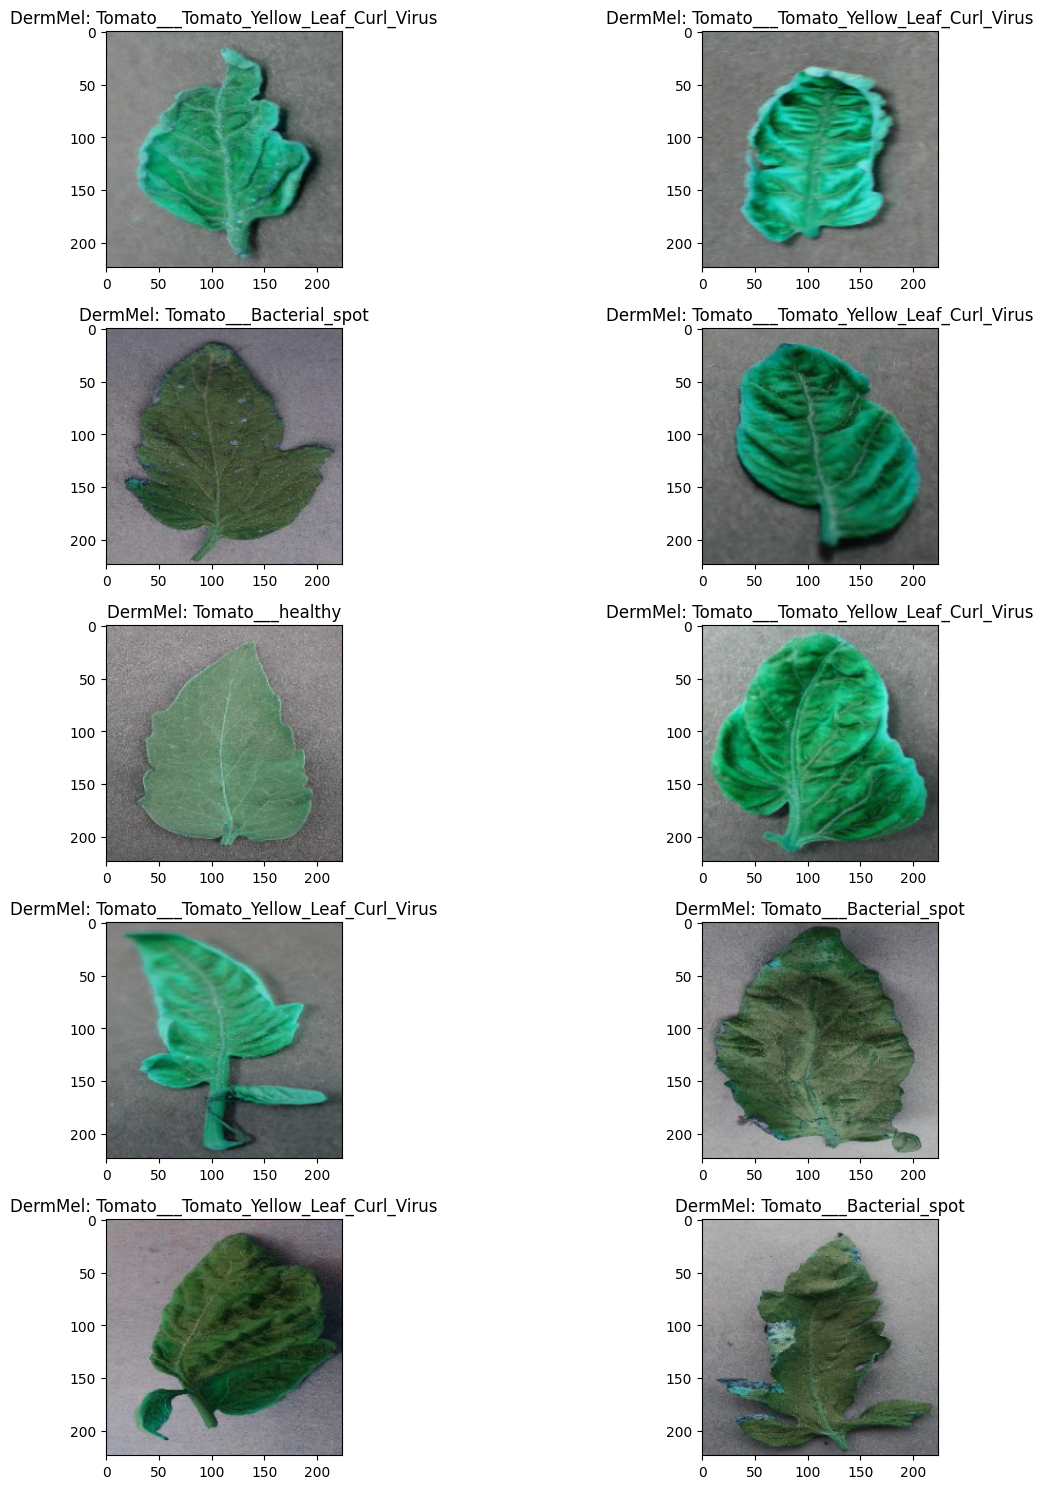

In [79]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title('DermMel: '+y_data[l])
        
plt.tight_layout()

In [80]:
x_data = np.array(x_data)

y_data = np.array(y_data)

print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (5589, 224, 224, 3) and that of Y is:  (5589,)


In [81]:
le=LabelEncoder()
Y=le.fit_transform(y_data)
Y=to_categorical(Y,num_cls)
x_data = x_data/255   #standarization 
Y.shape

(5589, 3)

In [96]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def build_model(input_shape=(224, 224, 3)):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    
    for layer in base_model.layers[:]:
        layer.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=l2())(x)
    predictions = Dense(38, activation='softmax')(x)
    
    # Construct the final model
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Compile the model with specified optimizer and loss
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Build the model
model = build_model()
model.summary() 

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

 conv2d_293 (Conv2D)            (None, 25, 25, 32)   6144        ['average_pooling2d_27[0][0]']   
                                                                                                  
 batch_normalization_287 (Batch  (None, 25, 25, 64)  192         ['conv2d_287[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_289 (Batch  (None, 25, 25, 64)  192         ['conv2d_289[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_292 (Batch  (None, 25, 25, 96)  288         ['conv2d_292[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_304 (Conv2D)            (None, 25, 25, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_304 (Batch  (None, 25, 25, 64)  192         ['conv2d_304[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_304 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_304[0][0]']
                                                                                                  
 conv2d_302 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_30

                                                                                                  
 activation_311 (Activation)    (None, 12, 12, 96)   0           ['batch_normalization_311[0][0]']
                                                                                                  
 max_pooling2d_14 (MaxPooling2D  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_308[0][0]',         
                                                                  'activation_311[0][0]',         
                                                                  'max_pooling2d_14[0][0]']       
                                                                                                  
 conv2d_31

 mixed4 (Concatenate)           (None, 12, 12, 768)  0           ['activation_312[0][0]',         
                                                                  'activation_315[0][0]',         
                                                                  'activation_320[0][0]',         
                                                                  'activation_321[0][0]']         
                                                                                                  
 conv2d_326 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_326 (Batch  (None, 12, 12, 160)  480        ['conv2d_326[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_336 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_336 (Batch  (None, 12, 12, 160)  480        ['conv2d_336[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_336 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_336[0][0]']
                                                                                                  
 conv2d_337 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_336[0][0]']         
                                                                                                  
 batch_normalization_337 (Batch  (None, 12, 12, 160)  480        ['conv2d_337[0][0]']             
 Normaliza

 activation_346 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_346[0][0]']
                                                                                                  
 conv2d_347 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_346[0][0]']         
                                                                                                  
 batch_normalization_347 (Batch  (None, 12, 12, 192)  576        ['conv2d_347[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_347 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_347[0][0]']
                                                                                                  
 conv2d_343 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_355 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_355[0][0]']
                                                                                                  
 conv2d_352 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_356 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_355[0][0]']         
                                                                                                  
 batch_normalization_352 (Batch  (None, 12, 12, 192)  576        ['conv2d_352[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_366 (Conv2D)            (None, 5, 5, 192)    245760      ['average_pooling2d_34[0][0]']   
                                                                                                  
 batch_normalization_358 (Batch  (None, 5, 5, 320)   960         ['conv2d_358[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_360 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_360[0][0]']
                                                                                                  
 activation_361 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_361[0][0]']
          

                                                                                                  
 activation_369 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_369[0][0]']
                                                                                                  
 activation_370 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_370[0][0]']
                                                                                                  
 activation_373 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_373[0][0]']
                                                                                                  
 activation_374 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_374[0][0]']
                                                                                                  
 batch_normalization_375 (Batch  (None, 5, 5, 192)   576         ['conv2d_375[0][0]']             
 Normaliza

In [83]:
test_label = os.listdir('data/valid')
print(test_label)

['Tomato___Bacterial_spot', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [84]:
x_test =[]
y_test = []

for label in test_label:
    path = test_path.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (224,224))
        x_test.append(np.array(image_resized))
        y_test.append(label)

In [85]:
x_test = np.array(x_test)
x_test = x_test/255
y_test = np.array(y_test)
le = LabelEncoder()
y = le.fit_transform(y_test)
y = to_categorical(y,num_cls)

In [86]:
x_test.shape,y.shape

((1396, 224, 224, 3), (1396, 3))

In [88]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')

In [89]:
history = model.fit(x_data,Y,epochs = 50, validation_data = (x_test,y),
                    verbose = 1)

Epoch 1/50
175/175 [==============================] - 31s 141ms/step - loss: 14.0115 - accuracy: 0.7556 - val_loss: 13.3920 - val_accuracy: 0.9126
Epoch 2/50
175/175 [==============================] - 11s 63ms/step - loss: 12.9693 - accuracy: 0.9245 - val_loss: 12.5367 - val_accuracy: 0.9491
Epoch 3/50
175/175 [==============================] - 11s 63ms/step - loss: 12.1613 - accuracy: 0.9472 - val_loss: 11.7598 - val_accuracy: 0.9663
Epoch 4/50
175/175 [==============================] - 11s 63ms/step - loss: 11.4007 - accuracy: 0.9567 - val_loss: 11.0189 - val_accuracy: 0.9670
Epoch 5/50
175/175 [==============================] - 11s 63ms/step - loss: 10.6730 - accuracy: 0.9648 - val_loss: 10.3058 - val_accuracy: 0.9713
Epoch 6/50
175/175 [==============================] - 11s 63ms/step - loss: 9.9766 - accuracy: 0.9694 - val_loss: 9.6290 - val_accuracy: 0.9756
Epoch 7/50
175/175 [==============================] - 11s 64ms/step - loss: 9.3133 - accuracy: 0.9726 - val_loss: 8.9823 - va

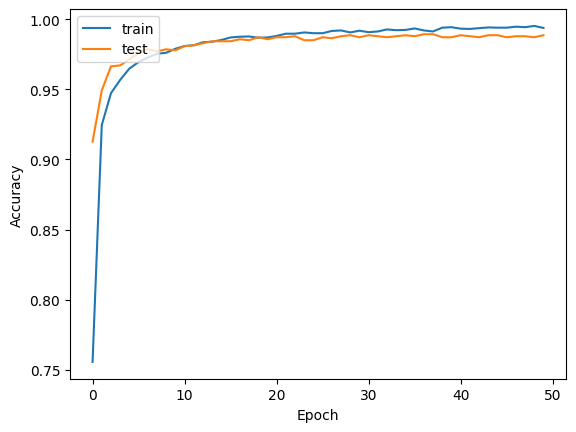

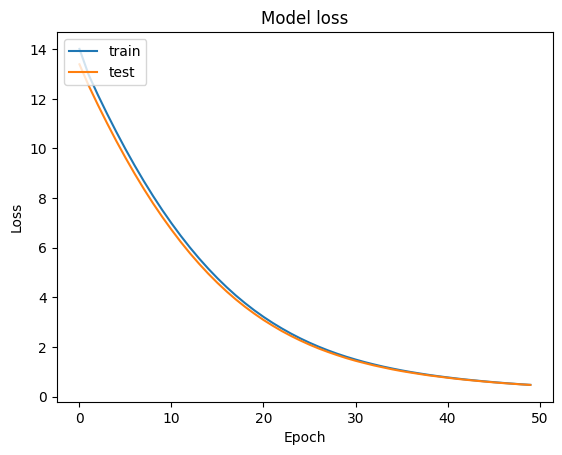

In [90]:
    fig=plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])    # plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    fig.savefig("accuracy.png")
    # # summarize history for loss
    fig=plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    fig.savefig("loss.png")

In [51]:
model.save('plantIncepV3.hdf5')
# model.load_weights('plantIncepV3.hdf5')

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# # 1. Load the trained model
model = load_model('plantIncepV3.hdf5')

# 2. Preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Assuming your model uses the same normalization
    return img_array

img_path = 'bs123.png'
img_array = preprocess_image(img_path)

# 3. Predict
predictions = model.predict(img_array)

predicted_class = np.argmax(predictions[0])

# 4. Postprocess (if needed)
# If you have class names, you can map the predicted_class index to its name
class_names = ['bs', 'ycv']  # Replace with your actual class names
print(f"Predicted class: {class_names[predicted_class]}")


1/1 [==============================] - 5s 5s/step
Predicted class: bs
